# Setup

In [1]:
# install requirements
!pip install numpy
!git clone https://github.com/piebro/factorio-blueprint-visualizer.git factorio_blueprint_visualizer

Cloning into 'factorio_blueprint_visualizer'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 70 (delta 30), reused 55 (delta 15), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [2]:
# import everything
import sys
import os
import json
from IPython.display import SVG, display
import numpy as np

sys.path.append(os.path.abspath("factorio_blueprint_visualizer"))
from factorio_blueprint_visualizer import draw_blueprints, save_svg, get_blueprint_cache, get_settings_from_svg
from random_settings import get_random_settings, settings_change_colors, settings_change_property
from building_settings import BUILDING_GENERIC_TERMS, BUILDING_SIZES

# Example

In [3]:
# get blueprint from file
with open('factorio_blueprint_visualizer/website/blueprint.txt', 'r') as blueprint_file:
  blueprint_cache = get_blueprint_cache(blueprint_file.read(), blueprint_name_or_number=0, bbox_border=3)

# get drawing settings from txt file
with open('factorio_blueprint_visualizer/website/settings.txt', 'r') as setting_file:
  settings = json.loads(setting_file.read().replace("'", "\""))

# or even better, get drawing settings directly from the svg file, 
# because the used drawing settings are written in the saved svg files
settings = get_settings_from_svg('factorio_blueprint_visualizer/website/start.svg')

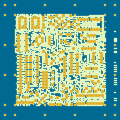

In [4]:
# get svg and display it
svg_str = draw_blueprints(None, None, settings, blueprint_cache, svg_max_size_in_mm=200)
display(SVG(data=svg_str))

In [5]:
# save the svg
save_svg("svgs", "blueprint", svg_str)

saved at: svgs/blueprint_00000.svg


# Custom Drawing Settings

In [6]:
# print existing settings for getting started with custom settings
print("settings =", get_settings_from_svg('factorio_blueprint_visualizer/website/start.svg'))

settings = [['meta', {'background': '#006992'}], ['default-svg-properties', {'stroke': '#eaf8bf', 'stroke-width': 0.3, 'bbox-scale': 0.95, 'bbox-rx': 0, 'bbox-ry': 0}], ['bbox', {'allow': ['electric-stuff'], 'fill': '#eca400'}], ['bbox', {'allow': ['chests'], 'fill': '#eaf8bf'}], ['bbox', {'allow': ['roboport'], 'fill': '#eaf8bf'}], ['bbox', {'allow': ['beacon'], 'fill': '#eaf8bf'}], ['bbox', {'allow': ['connected-stuff'], 'fill': '#eaf8bf'}], ['bbox', {'allow': ['producing-machines'], 'fill': '#eca400'}], ['bbox', {'allow': ['lab'], 'fill': '#eaf8bf'}]]


In [7]:
# custom drawing settings you can modify
settings = [
  ['meta', {'background': '#006992'}],
  ['default-svg-properties', {'stroke': '#eaf8bf', 'stroke-width': 0.3, 'bbox-scale': 0.95, 'bbox-rx': 0, 'bbox-ry': 0}],
  ['bbox', {'allow': ['electric-stuff'], 'fill': '#eca400'}],
  ['bbox', {'allow': ['chests'], 'fill': '#eaf8bf'}],
  ['bbox', {'allow': ['roboport'], 'fill': '#eaf8bf'}],
  ['bbox', {'allow': ['beacon'], 'fill': '#eaf8bf'}],
  ['bbox', {'allow': ['connected-stuff'], 'fill': '#eaf8bf'}],
  ['bbox', {'allow': ['producing-machines'], 'fill': '#eca400'}],
  ['bbox', {'allow': ['lab'], 'fill': '#eaf8bf'}]
]

# the drawing setting is an array of options that are drawn sequentially
# each option is consists of a name (e.g. 'bbox') and it's properties

# the names of all options are:
# meta, default-svg-properties, bbox, connected-belt, connected-underground-belt, connected-pipe-to-ground,
# connected-pipe, connected-inserter, connected-rail

# meta has only 'background' as a property and has to be in the first place

# most properties are normal svg properties. The ones that I tried and work well are:
# fill, stroke, stroke-width, stroke-linecap, opacity, stroke-opacity, fill-opacity
# stroke and fill are colors and can be 'none' for no color

# bbox has a few special properties:
# the 'bbox-scale' defines the scale and 'bbox-rx' and 'bbox-ry' how much the corners of the squares are curved
# 'allow' or 'deny' are arrays which defines which building bboxes are drawn (e.g. 'allow'=['lab'] draws only lab bboxes)

In [8]:
# there are some building abbreviations which define a set of buildings (e.g. 'chests' => ['wooden-chest', 'iron-chest', ...])
# all abbreviations are definded in 'BUILDING_GENERIC_TERMS'
print(list(BUILDING_GENERIC_TERMS.keys()))
print(BUILDING_GENERIC_TERMS['chests'])

['assembling-machine', 'producing-machines', 'belt-stuff', 'electric-stuff', 'furnace', 'drill', 'electicity-generation', 'military', 'all-inserter', 'chests', 'rail', 'connected-stuff', 'train-stuff']
['wooden-chest', 'iron-chest', 'steel-chest', 'logistic-chest-active-provider', 'logistic-chest-passive-provider', 'logistic-chest-storage', 'logistic-chest-buffer', 'logistic-chest-requester']


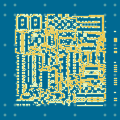

In [9]:
# draw blueprint with custom settings
custom_settings = settings = [                              
  ['meta', {'background': '#006992'}],
  ['default-svg-properties', {'stroke': '#eaf8bf', 'stroke-width': 0.3, 'bbox-scale': 0.95, 'bbox-rx': 0, 'bbox-ry': 0}],
  ['bbox', {'allow': ['electric-stuff'], 'fill': '#006992'}],
  ['bbox', {'allow': ['chests'], 'fill': '#006992'}],
  ['bbox', {'allow': ['roboport'], 'fill': '#eaf8bf'}],
  ['bbox', {'allow': ['beacon'], 'fill': '#006992'}],
  ['bbox', {'allow': ['connected-stuff'], 'fill': '#eaf8bf'}],
  ['bbox', {'allow': ['lab'], 'fill': '#eaf8bf'}],
  ['connected-belt', {'stroke': '#eca400', 'stroke-width': 0.5, "stroke-linecap":"round"}]
]
svg_str = draw_blueprints(None, None, settings, blueprint_cache, svg_max_size_in_mm=200)
display(SVG(data=svg_str))

In [10]:
# draw costum blueprint (e.g. this blueprint which can at: https://factorioprints.com/view/-MmM32Wg25ZlwEXCx8cu)
encoded_blueprint = "0eNrVXdtu4zgS/Rc/xwOxeA/2K/Z10QgUW0kE2HIgyz3baOTfV0q6YyUWzTrFDLD9Mj1J7FNkkad4Oyz+XN3vTs1z33bD6vbnqt0cuuPq9j8/V8f2sat30++GH8/N6nbVDs1+dbPq6v300+7w2B6HdrPuD/eHYfVys2q7bfPf1a16ucl+eTIy9KfN0B66CwBiAEzfeT7086/pl283q6Yb2qFt3mrw+sOPu+60v2/6sWDv366Px2Z/v2u7x/W+3jy1XbOmEfv5cGynEk1WR8C1qsJf9mb1Y8S24/+Npvpm076W5nn6ZyrnJxv0bmP6xHo4rB/7w6nbLqK7d3T3ir5tR/y3j9ACtsbLb1Plb3ajpX5svaZ7nL5+6tphqT7mQ30yNqZaLGDYPIbJYbg8hs5h+DwG5TAC3gZU2gYxX26VK7eq8iBVFgRmUIyllVeUK/jMRqrcOosRshhZJkSfxcgyIboshoPbwBW3QZY5MUtgBTMn6uJyZ5kTs8GLssSJ2aBBKouRDV6U50GWv5TnQTaQkIHbsSptR7KozeBTNh92P6Yvv8451g/9hLpkEWZZMIUWPWxRFVqEGelDocUIW7RlFnUFW6RCi/AY6WKhRYItukKL8EzUJWP54krg0qK5nPlfWrHxt43Rwgjcvc2mj9Pf1fSfvtnOFwbt+JNRL99elgKdPgedcf7e9G/z+PV9s1syrdS5p8aLyfzN+yKmez4tV9B9XBvV3bDeHPb3bVcPh37RoLlqcEQZ+sPu7r55qr+3I8T4vYd2NzQ9a3V3Xw/jR3+sXh15mpaGClrgXfs+TR5fcME5Ag593R2nRk67m67Ufgk8YK2pOa15OA2p5oxIXaq0MbO0JqsQcIU5ypzjV9sdm35sxSU+X0F1y51v0/abUzvcjX/bvmM9tP1xuBNtFvymybS2qarp5/1z3b+y5Xb1r9ULPwRokwgB5hxZ9822Pe3X7zOW58Ouue6XtzjXNe3j0/3h9Mo6UvRtyYwWRprJGhxpjJFHmkWDhZHmODTNbv28q4dGHG1yGImIY6wo4lx6wXx1l7+o0O++ri87+s27naar73fN3bY9Tv+ubkfSNOe/9k29vXuqu+1UnmF0xdg8D/XuOPvI7z+8fXZ/2I4gFZ9ISqcGU+OE4fdaF0+HXyMbSlzFipDgUFKV0TWKgv2CraWdOdlIcumnDAE+d8xP3W6pZ37su0sdU/E7pk31S6tE4/SlA7580Pswgfoj2G+rlJPPw+hDfRzWV+YVqopXOtkStgawwwfsJTQDdIcZnGIVFRltZn5QibKeQ+pxX+926129f16E8tlqeyiinc8tZNHZhtkh0rhwnHpls73edA7sFhGduc3dpC6nbmqMwxTD0vTNVZj3yqZvjjU/n1tJNLojHpDBPO+wyWxFZX3JGV4tKOsOywPSoDscQnpw+HbINKeqQHABSxXonIibqDATvuI0a4y57uFZtIsBLB0hZImxKHJ4zaqCy7qCRbnoQVdA222xcAjyDu15EYyDHuBmNBg1PUzNaMHSA6uOaLHSBx4lCStx4BFU53p3wCipiygZeJSssoXmURIMzwGjZFVGyQBTMoTcHDl4GBNcfwRoMyCURfAAj5cBjMKRxc0AzsajgpxUGNsjwV4CY3tk0TaAMTcayEtly4hoYSfpHNsizmDKYuIMBqNcxBhcGOViZHUdcJarKmgN6svC0DjPRxvFB7RCrNWpjyishkvuc110XCLDoC4PCg2+3pR1S1XB3PUW9b1nNalBYSH+el3Y9Vn89eAugZrJM7nuJ9QETtoq20sVPNZ6lQeFtpBcKOz6ijV5dmgEU/AI69BopoDNJeexVZpSLLo6j5YZXrs6h5qIvJ1xZ3LrKkUwL53N9m+CmejQeEJUYELxTOAisHM8oY8isNltjgVDhtecNuSb07JPi2wA+ULQEbf9TMd8nJopRHHhhv564cbbicqhazfrXyeIYv0GEyoh41AUpAIaLZkDUJSpC96Mfe0xccpzf7heROlKKhjRokmAVrI2JSav/l+UEMbOav/aBhSTbUBSoQtJaDVTFUNiFGKFZ21kSg/NQ7eysjPRnUw5oFPXobxM5pDECzI8ZstFWe0pdZELET3NhAe8tjJKqqUgUeCaaVQZtfFobbQMnVhTSGPw898rU5plG1aqzhDNDUCh48ycKGYaj3tQox4MUkWHbCg2Au3O5wH5g3bHxhtl/bfFC5mVTJ7BYw+kLqzQMcdiw3OlCiONBZU9hdMBy1z2xXzEt1YosxCFAItrCwJIyZlgj0mR6K4xZOKccnGZIrjYwKPViULthyzAYIK9mThD1I+dEglBeDHAkUinwQSHCB9tYXxxXMLrLOEdvPcaCeyzzgl1IqKY4uBxPiq0QkGo9hCSEB7lY3U1hI0xUQW1GMJ8JRRpyDqyx+QOoaxreCAEBHTt5eHz0uCyy0UPLMWDR0sMrMSDQ8FxhYPNuwNS34fC4cgDa/VgUf8wT14CZUN4wDhbuv83kw8yw1HQV8PRGN9UrBbDESYxDFQWHwKwhA8V2OABXsGHKksITHcYStc1uPDQ57fYAkRqH8pIHQBS+4i2MZPU3mdJPZMXMlnmr69bRtpStXipWmGiQ+/KWBYhTntfGK4irmMy2T6LCRB96Xw/AiO1N2CnxbWIXucdhJGaykgdEVJr1D9cUqscqQnUHqqyrk8VxuuqiNdUwSkg/PVlyhgCE2kgCBcnuuzZDFUQqV3h2ocqgNQOXI0QLlJ0Pu8gLxJRMUsMcNg5FBzaNnO2kHgK2Ct34EYWKSWsiyS0ksITu5hrrDY0TUNGYscbCnqR3AqYhjuNeg8juS4kueLLqNyVQdAtYjuJRIvpJpak0V4JS1+e5mGex/is2rFF+YyIUpkYSAWhSE3PRWpXiAXv6tmrE/zUUPlBl/krD/XmqRn7y3F0WP3YXK8N/VZisdypfMqdMyUnLskzXy/Ja/tDV5hKKQORkOARkVSCZyQBnLRMrmVYcYKMVHxmRPEUz2861xC5j1ra1wZ8bOp+/fdT0+yWDTqZXMmkctN6fhaWmbYqCRdESV0M55yD8CSkcxsCZ8+kjEj6m5RzZkpFdt6XJBaVZGJJopYkqv/s4VxqYG3QfCjJYls0lUgSyRVkiYcd4EvydCSrEEpScyRRozyBPOoXg2b+SBXaKHnGdbjQBOboSBZaFyS4SIIaeQ532BO2IMdFsgIOTBKRBPJg4oYkUJCnU4ddGguyIaQqYHkZA9BR2ip5yvfPfmEmJ7dUcNaddI8uODFOghp5dnqpc1iDY9BoMzt51ntpTVjUDYTWJBSchCYbOhYcTaZAXSXP+y/0uVPyxP9Sk7wEAh5sZsdK/eEdCmsKzvOSDW0LzsCSoE7+ooK0KXmJAyrU54EFq1DYKH8AQuggXxUcHKUa2quCw5YkaMFbFVLnaPg2eLL0vEwBFuwx3sqf0/jslItX+RbMsSbBLh8KZsI1xqMczgNbrj6ktlx9wN4nmFrjH97Dv3wJ8eveJhidnPREhO/Fp1oyAEd7sw17m4JTIjjDOiAKgN7V5iPSTB4Hv/Hwi3ysE4tgRD7xqWJbEVzqUa9Q8PyMC19/kFFvv9fdZhxuSjMLsIBShxqYiG9+qBEkhxqIim9+qMF614WCMGtBYKFH8X39IDoyman7kBOHkOj/kWS3w3muj8Kb7fEPSy5AMfWSDkUjc0H4x59aWY4Qf0T+jLFjJf0tfGyA2aGd6IAuyT5hPgJmYQN+nzh+6oCf7hMvjvAxyu7K894vq4RZC5jo0E1li6JDOQoMig7lKNAoOvQkCKHoVnZDnIkufHyAiY5kOI8oODAXigEFR7Kbo0RFZJIR5amSXSZmgssuEzPBAZZGlEYKIGlEI4ACOBpRiiIpHCPKUOVFV0OZ4MhFQpT+KopucfLAqRLdP2WCAwwNKEOJRJc3meDIRUGURITc+UXpT8idX5REiFYuoPQnL7q4xwRHLhCh9EeSIHqUoRpgqEcZiqT68yiJNIkutTHBtehGGBMcYKhHGYrkx/MoQ5H0eB5lKJIrz6EkQhLnOZT+SN48hzIUSaLnUIYagKEOZSiSMM+hDEXy5TmURMaIrhAxwVkCH3dlX9gswiIpylHiI8/8OpT4BuCmRYmPvOprUeJb2WleXN6d00gWO4tS3ZKorK87id9u3rZyb1f3u1Pz3Lfd9K1dPX59/N2/p8PY4/iL701/fCtAUMZH8obGwGvdy8v/AB2XQeM="
blueprint_cache = get_blueprint_cache(encoded_blueprint, 0, bbox_border=3)
svg_str = draw_blueprints(None, None, settings, blueprint_cache, svg_max_size_in_mm=200)
display(SVG(data=svg_str))

#Random Settings

In [11]:
# randomly modify your settings
random_settings = settings = [                     
  ['meta', {'background': '#006992'}],
  ['default-svg-properties', {'stroke': '#eaf8bf', 'stroke-width': 0.3, 'bbox-scale': 0.95, 'bbox-rx': 0, 'bbox-ry': 0}],
  ['bbox', {'allow': ['electric-stuff'], 'fill': '#006992'}],
  ['bbox', {'allow': ['chests'], 'fill': '#006992'}],
  ['bbox', {'allow': ['roboport'], 'fill': '#eaf8bf'}],
  ['bbox', {'allow': ['beacon'], 'fill': '#006992'}],
  ['bbox', {'allow': ['connected-stuff'], 'fill': '#eaf8bf'}],
  ['bbox', {'allow': ['lab'], 'fill': '#eaf8bf'}],
  ['connected-belt', {'stroke': '#eca400', 'stroke-width': 0.5, "stroke-linecap":"round"}]
]
# 'settings_change_colors' uses random colors from predefined color palettes
random_settings = settings_change_colors(random_settings, color_count=3, change_background=True)
settings = settings_change_property(settings, "stroke-width", lambda v: v*np.random.uniform(0.5, 2))
settings = settings_change_property(settings, "bbox-scale", lambda v: v*np.random.uniform(0.7, 1))

svg_str = draw_blueprints(None, None, random_settings, blueprint_cache, svg_max_size_in_mm=200)
display(SVG(data=svg_str))

In [12]:
# or get new random settings like this
random_settings = get_random_settings()
svg_str = draw_blueprints(None, None, random_settings, blueprint_cache, svg_max_size_in_mm=200)
display(SVG(data=svg_str))

# Add custom buildings and building abbrevations

In [13]:
# add abbreviations like this or in building_settings.py
BUILDING_GENERIC_TERMS = {**BUILDING_GENERIC_TERMS, "non-logistic-chests": ['wooden-chest', 'iron-chest', 'steel-chest']}
print(BUILDING_GENERIC_TERMS['non-logistic-chests'])

['wooden-chest', 'iron-chest', 'steel-chest']


In [14]:
# all buildings and their bboxes are definded at 'BUILDING_SIZES'
# you can add custom buildings (e.g. from mods) like this or in building_settings.py
BUILDING_SIZES = {**BUILDING_SIZES, "some-mod-building-name":(2,2)}